In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

## Importing the dataset

In [27]:
full_dataset = pd.read_csv("D:/programming/full_datasetpy.csv")
airports = pd.read_csv("D:/programming/dataverse_files/airports.csv")

## Subsetting out the relevant columns

In [28]:
full_dataset = full_dataset[["Year","Month","Origin", "Dest"]]
airportstest = airports[["iata", "state" , "country" ]]

## Merging for a dataset

In [29]:
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [30]:
airports.rename(
    columns={"iata":"Dest",
            }
          ,inplace=True)

In [31]:
merged_set = pd.merge(full_dataset,airports, on = 'Dest')
merged_set


,Year,Month,Origin,Dest,airport,city,state,country,lat,long
0,2005,1,BOS,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
1,2005,1,BOS,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
2,2005,1,BOS,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
3,2005,1,BOS,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
4,2005,1,BOS,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464
...,...,...,...,...,...,...,...,...,...,...
13985533,2006,12,BOS,TTN,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468
13985534,2006,12,ATL,TTN,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468
13985535,2006,12,BOS,TTN,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468
13985536,2006,12,BOS,TTN,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468


In [32]:
airports.rename(
    columns={"Dest":"Origin",
            }
          ,inplace=True)


In [33]:
merged_set = pd.merge(full_dataset,airports, on = 'Origin')

In [34]:
merged_set = merged_set.dropna()

## creating flight route column

In [35]:
merged_set['route'] = merged_set['Origin'].str.cat(merged_set[['Dest']].values,sep=' - ')
merged_set

,Year,Month,Origin,Dest,airport,city,state,country,lat,long,route
0,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
1,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
2,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
3,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
4,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
...,...,...,...,...,...,...,...,...,...,...,...
13985533,2006,12,TTN,BOS,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - BOS
13985534,2006,12,TTN,ATL,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - ATL
13985535,2006,12,TTN,BOS,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - BOS
13985536,2006,12,TTN,BOS,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - BOS


## Splitting dataset for quarters of each year

In [36]:
merged_set["Year"] = merged_set["Year"].astype(int)
merged_set["Month"] = merged_set["Month"].astype(int)
merged_set

,Year,Month,Origin,Dest,airport,city,state,country,lat,long,route
0,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
1,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
2,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
3,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
4,2005,1,BOS,ORD,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,BOS - ORD
...,...,...,...,...,...,...,...,...,...,...,...
13985533,2006,12,TTN,BOS,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - BOS
13985534,2006,12,TTN,ATL,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - ATL
13985535,2006,12,TTN,BOS,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - BOS
13985536,2006,12,TTN,BOS,Trenton-Mercer County,Trenton,NJ,USA,40.276691,-74.813468,TTN - BOS


In [37]:
merged_set2005 = merged_set[( merged_set.Year == 2005)]
merged_set1 = merged_set2005[(merged_set2005.Month <= 3)]
merged_set2 = merged_set2005[(merged_set2005.Month > 3) & (merged_set2005.Month <= 6)]
merged_set3 = merged_set2005[(merged_set2005.Month > 6) & (merged_set2005.Month <= 9)]
merged_set4 = merged_set2005[(merged_set2005.Month > 9) & (merged_set2005.Month <= 12)]

merged_set2006 = merged_set[( merged_set.Year == 2006)]
merged_set5 = merged_set2006[(merged_set2006.Month <= 3)]
merged_set6 = merged_set2006[(merged_set2006.Month > 3) & (merged_set2006.Month <= 6)]
merged_set7 = merged_set2006[(merged_set2006.Month > 6) & (merged_set2006.Month <= 9)]
merged_set8 = merged_set2006[(merged_set2006.Month > 9) & (merged_set2006.Month <= 12)]


## Preparing data for Data Visualisation

In [38]:
merged_set1 = merged_set1.route.value_counts()
merged_set1 = merged_set1.to_frame()
merged_set1 = merged_set1.reset_index()
merged_set1.rename(
    columns={"route":"Jan-Mar2005",
            "index": "route"}
          ,inplace=True)


In [39]:
merged_set2 = merged_set2.route.value_counts()
merged_set2 = merged_set2.to_frame()
merged_set2 = merged_set2.reset_index()
merged_set2.rename(
    columns={"route":"Apr-Jun2005",
            "index": "route"}
          ,inplace=True)


In [40]:
merged_set3 = merged_set3.route.value_counts()
merged_set3 = merged_set3.to_frame()
merged_set3 = merged_set3.reset_index()
merged_set3.rename(
    columns={"route":"Jul-Sep2005",
            "index": "route"}
          ,inplace=True)


In [41]:
merged_set4 = merged_set4.route.value_counts()
merged_set4 = merged_set4.to_frame()
merged_set4 = merged_set4.reset_index()
merged_set4.rename(
    columns={"route":"Oct-Dec2005",
            "index": "route"}
          ,inplace=True)

In [42]:
merged_set5 = merged_set5.route.value_counts()
merged_set5 = merged_set5.to_frame()
merged_set5 = merged_set5.reset_index()
merged_set5.rename(
    columns={"route":"Jan-Mar2006",
            "index": "route"}
          ,inplace=True)

In [43]:
merged_set6 = merged_set6.route.value_counts()
merged_set6 = merged_set6.to_frame()
merged_set6 = merged_set6.reset_index()
merged_set6.rename(
    columns={"route":"Apr-Jun2006",
            "index": "route"}
          ,inplace=True)

In [44]:
merged_set7 = merged_set7.route.value_counts()
merged_set7 = merged_set7.to_frame()
merged_set7 = merged_set7.reset_index()
merged_set7.rename(
    columns={"route":"Jul-Sep2006",
            "index": "route"}
          ,inplace=True)

In [45]:
merged_set8 = merged_set8.route.value_counts()
merged_set8 = merged_set8.to_frame()
merged_set8 = merged_set8.reset_index()
merged_set8.rename(
    columns={"route":"Oct-Dec2006",
            "index": "route"}
          ,inplace=True)

In [46]:
df = merged_set1.merge(merged_set2, how = 'inner')
df = df.merge(merged_set3, how = 'inner')
df = df.merge(merged_set4, how = 'inner')
df = df.merge(merged_set5, how = 'inner')
df = df.merge(merged_set6, how = 'inner')
df = df.merge(merged_set7, how = 'inner')
df = df.merge(merged_set8, how = 'inner')
df

,route,Jan-Mar2005,Apr-Jun2005,Jul-Sep2005,Oct-Dec2005,Jan-Mar2006,Apr-Jun2006,Jul-Sep2006,Oct-Dec2006
0,LAX - SAN,3577,3722,3891,3817,3635,3612,3654,3379
1,SAN - LAX,3572,3714,3877,3809,3633,3611,3645,3367
2,BOS - LGA,3093,3238,3132,3024,2977,3010,2928,2889
3,LGA - BOS,3055,3216,3142,3025,2983,3018,2934,2894
4,DCA - LGA,3036,3079,3016,2909,2939,2912,2854,2814
...,...,...,...,...,...,...,...,...,...
3525,PWM - DTW,3,168,225,46,86,151,180,153
3526,SEA - CLE,3,60,91,16,3,58,94,18
3527,CLE - SEA,2,59,90,17,2,60,93,19
3528,ATL - ISO,1,268,225,226,169,177,168,165


## Taking the top 40 routes with highest frequency

In [47]:
df.set_index('route', inplace=True)
df["totalfreq"] = df.sum(axis=1)
df = df.sort_values('totalfreq', ascending=True)

In [48]:
df = df.tail(40)
df

,Jan-Mar2005,Apr-Jun2005,Jul-Sep2005,Oct-Dec2005,Jan-Mar2006,Apr-Jun2006,Jul-Sep2006,Oct-Dec2006,totalfreq
route,,,,,,,,,
SAN - PHX,1954,2003,2026,1998,2211,2256,2278,2183,16909
PHX - DEN,1230,1592,1873,1920,2615,2634,2603,2543,17010
DFW - ORD,2062,2122,2267,2164,2055,2157,2153,2103,17083
LAX - JFK,1976,2290,2444,2133,1954,2111,2121,2066,17095
JFK - LAX,1979,2292,2461,2132,1953,2109,2140,2062,17128
LIH - HNL,1408,1419,1513,1445,1408,2781,3779,3449,17202
MCO - ATL,2066,2160,2218,2222,2193,2206,2093,2196,17354
ATL - MCO,2049,2166,2220,2220,2185,2208,2105,2210,17363
LAX - SFO,1985,2103,2102,2082,2037,2092,2679,2803,17883


In [49]:
df = df.drop(labels='totalfreq', axis=1)
df

,Jan-Mar2005,Apr-Jun2005,Jul-Sep2005,Oct-Dec2005,Jan-Mar2006,Apr-Jun2006,Jul-Sep2006,Oct-Dec2006
route,,,,,,,,
SAN - PHX,1954,2003,2026,1998,2211,2256,2278,2183
PHX - DEN,1230,1592,1873,1920,2615,2634,2603,2543
DFW - ORD,2062,2122,2267,2164,2055,2157,2153,2103
LAX - JFK,1976,2290,2444,2133,1954,2111,2121,2066
JFK - LAX,1979,2292,2461,2132,1953,2109,2140,2062
LIH - HNL,1408,1419,1513,1445,1408,2781,3779,3449
MCO - ATL,2066,2160,2218,2222,2193,2206,2093,2196
ATL - MCO,2049,2166,2220,2220,2185,2208,2105,2210
LAX - SFO,1985,2103,2102,2082,2037,2092,2679,2803


## Data visualisation using heatmap

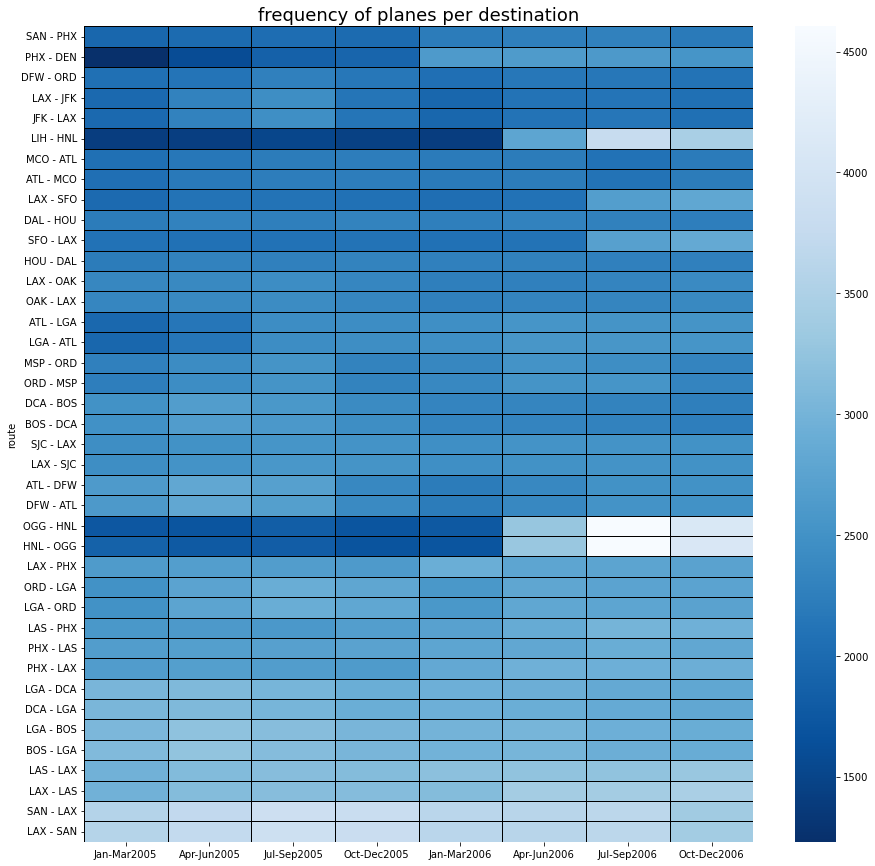

In [50]:
from matplotlib import colors
cmap = colors.ListedColormap(['darkblue','blue'])
fig, ax = plt.subplots(figsize=(15,15))    
title = "frequency of planes per destination"
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5,1.05])
sns.heatmap(df, annot=False, linewidths=.5, cmap="Blues_r", linecolor='black')
plt.savefig("heatmap3.png")

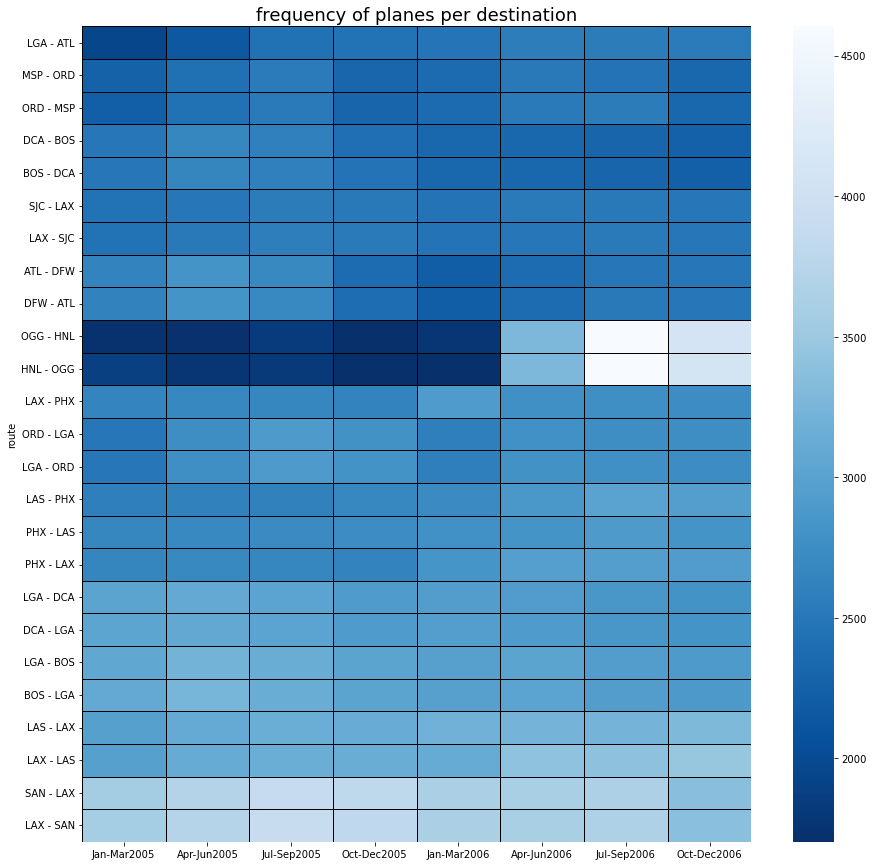

In [51]:
df1 = df.tail(25)
cmap = colors.ListedColormap(['darkblue','blue'])
fig, ax = plt.subplots(figsize=(15,15))    
title = "frequency of planes per destination"
plt.title(title, fontsize = 18)
ttl = ax.title
ttl.set_position([0.5,1.05])
sns.heatmap(df1, annot=False, linewidths=.5, cmap="Blues_r", linecolor='black')
plt.savefig("heatmap2q3.png")